## Thiết Kế Hồi Quy Gián Đoạn

Dù không ngẫm nghĩ nhiều về nó nhưng chúng ta không khỏi ấn tượng bởi tính liên tục của tự nhiên. Bạn không thể trồng cây mà  nụ không nở trước, bạn không thể dịch chuyển tức thời từ nơi này sang nơi khác, vết thương cần thời gian để chữa lành. Ngay cả trong lĩnh vực xã hội, sự liên tục dường như là một chuẩn mực. Bạn không thể phát triển doanh nghiệp chỉ trong một ngày, cần phải có sự kiên định và chăm chỉ để tích luỹ của cải và phải mất đến nhiều năm để bạn nắm được cách hồi quy tuyến tính hoạt động. Trong những trường hợp thường thấy, tự nhiên rất có tính liên kết và không thay đổi nhiều.

```
Làm sao đem hết xác hồn,
Hòa mình với Đạo chẳng còn lìa xa.
```
\- Đạo Đức Kinh, Lão Tử.

Có nghĩa là **khi chúng ta nhìn thấy những thay đổi đột ngột, có thể chúng là nhân tạo**, hay nói cách khác là những tình huống do con người tạo ra. Những sự kiện này thường đi kèm với những giả tưởng đối với những chuyện thông thường: nếu một điều kỳ lạ xảy ra, nó cho chúng ta một số hiểu biết về những gì có thể đã xảy ra nếu tự nhiên vận hành theo một hướng khác. Khám phá những biến đổi nhân tạo này là cốt lõi của mô hình Thiết Kế Hồi Quy Gián Đoạn.

![img](./data/img/rdd/smooth.png)

Thiết lập cơ bản có dạng như sau. Hãy tưởng tượng bạn có một biến can thiệp \\(T\\) và các kết quả tiềm năng \\(Y_0\\) và \\(Y_1\\). Can thiệp T là một hàm gián đoạn của biến chỉ định quan sát được \\(R\\) sao cho


$
D_i = \mathcal{1}\{R_i>c\}
$

Nói cách khác, can thiệp có giá trị 0 khi \\(R\\) dưới ngưỡng quyết định \\(c\\) và có giá trị 1 đối với trường hợp ngược lại. Điều này có nghĩa là chúng ta phải quan sát \\(Y_1\\) khi \\(R>c\\) và \\(Y_0\\) khi \\(R<c\\). Để hiểu rõ được điều này, hãy nghĩ về các kết quả tiềm năng như 2 chức năng mà ta không thể quan sát hoàn toàn. Cả \\(Y_0(R)\\) và \\(Y_1(R)\\) đều ở đó, chúng ta chỉ là không thể thấy chúng. Ngưỡng hoạt động như một công tắc cho phép ta nhìn thấy một trong hai chức năng đó chứ không bao giờ thấy được cả hai chức năng cùng một lúc, giống như trong hình dưới đây:

![img](./data/img/rdd/rdd.png)

Ý tưởng của hồi quy gián đoạn là so sánh kết quả ngay trên và ngay dưới ngưỡng quyết định để xác định tác động can thiệp tại ngưỡng quyết định. Đây được gọi là thiết kế **RD sắc  **, vì xác suất nhận được can thiệp tăng từ 0 đến 1 ngay tại ngưỡn quyết định quyết định quyết địnhg quyết định, nhưng chúng ta cũng có thể tìm hiểu về **thiết kế RD mờ**, trong đó xác suất cũng tăng, nhưng ít cực đoan hơn.

## Có Phải Rượu Đang Giết Bạn?

Một câu hỏi về chính sách công rất liên quan là độ tuổi uống rượu tối thiểu là bao nhiêu. Hầu hết ở các quốc gia, bao gồm cả Brazil, là 18 tuổi trở lên, nhưng ở Mỹ (hầu hết các bang), hiện tại là 21. Vậy, có phải tại Mỹ đang quá thận trọng và họ nên giảm độ tuổi uống rượu tối thiểu? Hay là các quốc gia khác nên tăng độ tuổi uống rượu hợp pháp tại đất nước của mình?

Một cách để xem xét câu hỏi này là từ [góc độ tỷ lệ tử vong (Carpenter và Dobkin, 2009)](https://www.aeaweb.org/articles?id=10.1257/app.1.1.164). Từ quan điểm chính sách công, người ta có thể tranh luận rằng chúng ta nên giảm tỷ lệ tử vong càng nhiều càng tốt. Nếu uống rượu làm gia tăng đáng kể tỷ lệ tử vong, chúng ta nên tránh hạ độ tuổi uống rượu tối thiểu. Điều này sẽ phù hợp với mục tiêu giảm tử vong gây ra bởi uống rượu.

Để ước lượng tác động của rượu, chúng ta có thể sử dụng thực tế là độ tuổi uống rượu hợp pháp gây ra sự gián đoạn đối với tự nhiên. Tại Mỹ, những người dưới 21 tuổi không uống rượu (hoặc uống ít hơn nhiều) trong khi những người trên 21 tuổi lại uống. Điều này có nghĩa là xác suất uống rượu tăng vọt ở độ tuổi 21 và đó là điều mà chúng ta có thể khám phá với RDD.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

style.use("fivethirtyeight")

Để làm được như vậy, chúng ta có thể lấy một số dữ liệu tử vong tổng hợp theo độ tuổi. Mỗi hàng là một độ tuổi trung bình của một nhóm người và tỷ lệ tử vong trung bình gây ra bởi tất cả các nguyên nhân (`all`), do tai nạn giao thông (`mva`) và do tự tử (`suicide`).

In [2]:
drinking = pd.read_csv("./data/drinking.csv")
drinking.head()[["agecell", "all", "mva", "suicide"]]

,agecell,all,mva,suicide
0,19.068493,92.825400,35.829327,11.203714
1,19.150684,95.100740,35.639256,12.193368
2,19.232876,92.144295,34.205650,11.715812
3,19.315070,88.427760,32.278957,11.275010
4,19.397260,88.704940,32.650967,10.984314


Để dễ hình dung, cũng như vì một lí do quan trọng không kém ở phần sau, chúng ta sẽ tập trung biến chỉ định `agecell` tại ngưỡng quyết định ở tuổi 21.

In [3]:
drinking["agecell"] -= 21

Nếu chúng ta vẽ biểu đồ của nhiều biến kết quả (`all`,`mva`, `suicide`) với biến chỉ định trên trục x, chúng ta thấy được rằng tỷ lệ tử vong cũng tăng lên khi ta vượt qua độ tuổi uống rượu hợp pháp.

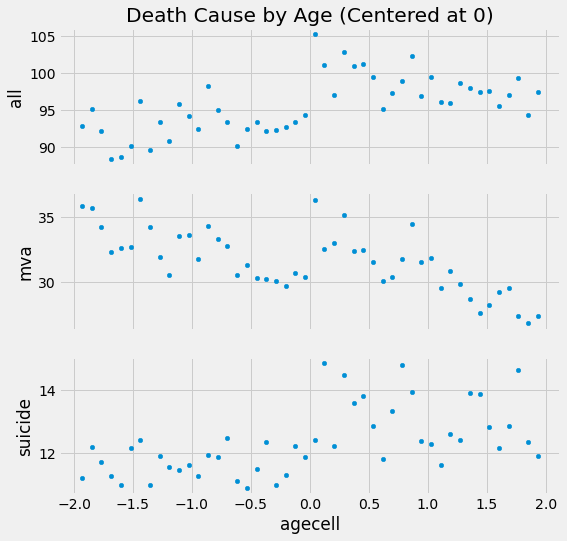

In [4]:
plt.figure(figsize=(8,8))
ax = plt.subplot(3,1,1)
drinking.plot.scatter(x="agecell", y="all", ax=ax)
plt.title("Death Cause by Age (Centered at 0)")

ax = plt.subplot(3,1,2, sharex=ax)
drinking.plot.scatter(x="agecell", y="mva", ax=ax)

ax = plt.subplot(3,1,3, sharex=ax)
drinking.plot.scatter(x="agecell", y="suicide", ax=ax);


Có một số dấu hiệu, nhưng chúng ta cần nhiều hơn thế. Chính xác thì việc uống rượu bia tác động lên tỷ lệ tử vong tại ngưỡng quyết định nào? Và sai số chuẩn cho ước lượng đó là bao nhiêu?

## Ước lượng RDD 

Giả thiết chủ đạo mà RDD dựa vào là sự liên tục của kết quả tiềm năng tại ngưỡng quyết định. Nói một cách chính xác thì giới hạn của các kết quả tiềm năng khi biến chỉ định tiệm cận ngưỡng quyết định từ bên phải và bên trái phải như nhau.

$$
\lim_{r \to c^-} E[Y_{ti}|R_i=r] = \lim_{r \to c^+} E[Y_{ti}|R_i=r]
$$

Nếu điều kiện này thoả mãn, chúng ta có thể tìm được tác động nhân quả tại ngưỡng quyết định

\begin{align}
\lim_{r \to c^+} E[Y_{ti}|R_i=r] - \lim_{r \to c^-} E[Y_{ti}|R_i=r]=&\lim_{r \to c^+} E[Y_{1i}|R_i=r] - \lim_{r \to c^-} E[Y_{0i}|R_i=r] \\
=& E[Y_{1i}|R_i=r] - E[Y_{0i}|R_i=r] \\
=& E[Y_{1i} - Y_{0i}|R_i=r]
\end{align}

Theo một cách nào đó thì đây chính là một dạng của Tác Động Can Thiệp Bình Quân Cục Bộ (LATE), vì chúng ta chỉ có thể biết nó tại ngưỡng quyết định. Trong thiết lập này, chúng ta có thể coi RDD như một thử nghiệm ngẫu nhiên cục bộ. Đối với những người tại ngưỡng quyết định, can thiệp có thể diễn ra một cách tình cờ theo cả hai hướng, một số người nằm dưới ngưỡng quyết định, và một số người lại nằm trên. Trong ví dụ của chúng ta, tại cùng một thời điểm, một số người chỉ vừa qua độ tuổi 21 và một số người sắp tròn 21 tuổi. Những thứ quyết định điều này là liệu có ai đó được sinh ra sau đó vài ngày hay không, điều này khá ngẫu nhiên. Vì lý do này, RDD cho thấy một câu chuyện về nhân quả rất hấp dẫn. Nó không phải là tiêu chuẩn vàng như RCT, nhưng nó cũng gần như thế.

Bây giờ, để ước lượng tác động can thiệp tại ngưỡng quyết định, tất cả những gì chúng ta cần làm là ước lượng cả hai giới hạn trong công thức trên và so sánh chúng. Cách đơn giản nhất để làm điều đó là chạy một mô hình hồi quy tuyến tính

![img](./data/img/rdd/ols.png)

Để cho nó hoạt động, chúng ta cho biến giả trên ngưỡng quyết định tác động lên biến chỉ định

$
y_i = \beta_0 + \beta_1 r_i + \beta_2 \mathcal{1}\{r_i>c\} + \beta_3 \mathcal{1}\{r_i>c\} r_i
$

Điều mà ta đang làm là áp một hồi quy tuyến tính trên ngưỡng quyết định và một hồi quy khác ở dưới ngưỡng quyết định đó. Tham số \\(\beta_0\\) là hệ số chặn của hồi quy dưới ngưỡng quyết định và \\(\beta_0+\beta_2\\) là hệ số chặn của hồi quy trên ngưỡng quyết định.

Và đây là lúc thủ thuật đặt gốc tọa độ 0 tại ngưỡng chỉ định can thiệp phát huy tác dụng. Sau bước tiền xử lý này, ngưỡng quyết định sẽ trở thành 0. Điều này khiến hệ số chặn \\(\beta_0\\) là giá trị được dự đoán ở ngưỡng quyết định, cho hồi quy bên dưới nó. Nói cách khác, \\(\beta_0=\lim_{r \to c^-} E[Y_{ti}|R_i=r]\\). Với lập luận tương tự, \\(\beta_0+\beta_2\\) là giới hạn của kết quả ở trên. Nghĩa là

$
\lim_{r \to c^+} E[Y_{ti}|R_i=r] - \lim_{r \to c^-} E[Y_{ti}|R_i=r]=\beta_2=E[ATE|R=c]
$

Điều này được thể hiện qua đoạn code dưới đây trong trường hợp chúng ta ước lượng tác động của việc uống rượu đến tỷ lệ tử vong gây ra bởi mọi nguyên nhân ở độ tuổi 21.

In [5]:
rdd_df = drinking.assign(threshold=(drinking["agecell"] > 0).astype(int))

model = smf.wls("all~agecell*threshold", rdd_df).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.6184,0.932,100.399,0.000,91.739,95.498
agecell,0.8270,0.819,1.010,0.318,-0.823,2.477
threshold,7.6627,1.319,5.811,0.000,5.005,10.320
agecell:threshold,-3.6034,1.158,-3.111,0.003,-5.937,-1.269


Mô hình này cho chúng ta biết rằng tỷ lệ tử vong tăng 7.6627 điểm khi uống rượu. Một cách nói khác là rượu làm tăng 8% nguy cơ tử vong gây ra bởi mọi nguyên nhân ((7.6627+93.6184)/93.6184). Lưu ý rằng điều này cũng cung cấp cho chúng ta các sai số chuẩn cho ước lượng của tác động nhân quả. Trong trường hợp này, tác động có ý nghĩa thống kê, vì trị số p có giá trị dưới 0.01.

Nếu chúng ta muốn xác minh mô hình này bằng đồ thị, ta có thể biểu thị các giá trị dự đoán trên dữ liệu mà chúng ta có. Bạn có thể thấy rằng chúng ta có 2 mô hình hồi quy: một cho những người có độ tuổi trên 21 và một cho độ tuổi dưới 21.

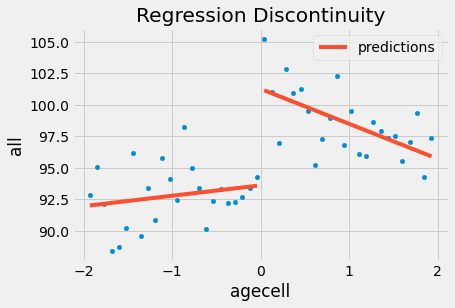

In [6]:
ax = drinking.plot.scatter(x="agecell", y="all", color="C0")
drinking.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity");

Nếu ta làm tương tự cho những tác nhân khác, ta sẽ có như sau

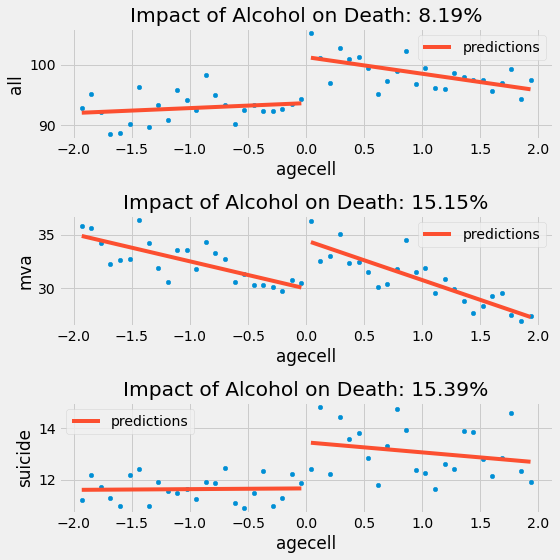

In [7]:
plt.figure(figsize=(8,8))

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)
    drinking.plot.scatter(x="agecell", y=cause, ax=ax)
    m = smf.wls(f"{cause}~agecell*threshold", rdd_df).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    drinking.assign(predictions=m.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

RDD cho thấy uống rượu làm tăng 15% nguy cơ tử vong do tự tử và tai nạn xe hơi, đây là một con số khá lớn. Những kết quả này là những lý lẽ thuyết phục để không hạ độ tuổi uống rượu tối thiểu nếu chúng ta muốn giảm thiểu tỷ lệ tử vong.

### Tỷ Trọng Kernel

Hồi Quy Gián Đoạn phần lớn dựa vào các đặc điểm ngoại suy của hồi quy tuyến tính. Vì chúng ta đang xem xét các giá trị tại điểm đầu và cuối của 2 đường hồi quy, tốt hơn hết chúng ta nên xác định đúng các giới hạn đó. Những gì có thể xảy ra là hồi quy có thể đã tập trung quá nhiều vào việc khớp các điểm dữ liệu khác để đổi lại tỷ lệ khớp đáng thất vọng tại ngưỡng quyết định. Nếu điều này xảy ra, rất có thể chúng ta đã đo lường sai tác động can thiệp.

Một cách để giải quyết vấn đề trên là gán trọng số cao hơn cho các điểm nằm gần ngưỡng quyết định hơn. Có nhiều cách để làm được điều này, nhưng một cách phổ biến là điều chỉnh lại trọng số cho các mẫu thông qua **hàm tam giác kernel**

$
K(R, c, h) = \mathcal{1}\{|R-c| \leq h\} * \bigg(1-\frac{|R-c|}{h}\bigg)
$

Phần đầu tiên của kernel là một hàm chỉ số cho biết chúng ta đã gần ngưỡng quyết định hay chưa. Gần như thế nào? Điều này được xác định bởi tham số dải tần suất \\(h\\). Phần thứ hai của kernel là một hàm tỷ trọng. Khi chúng ta rời xa ngưỡng quyết định, trọng số ngày càng nhỏ hơn. Các trọng số được chia cho dải tần suất. Nếu dải tần suất lớn, trọng số sẽ giảm dần với tốc độ chậm. Nếu dải tần suất nhỏ, trọng số sẽ nhanh chóng tiến về 0.

Để dễ hiểu hơn, ta sẽ biểu diễn các tỷ trọng đối với kernel được áp dụng trong bài toán này. Tôi đã thiết lập dải tần suất tại đây là 1, có nghĩa là chúng ta sẽ chỉ xem xét dữ liệu từ những người không quá 22 tuổi và không dưới 20 tuổi.

In [8]:
def kernel(R, c, h):
    indicator = (np.abs(R-c) <= h).astype(float)
    return indicator * (1 - np.abs(R-c)/h)

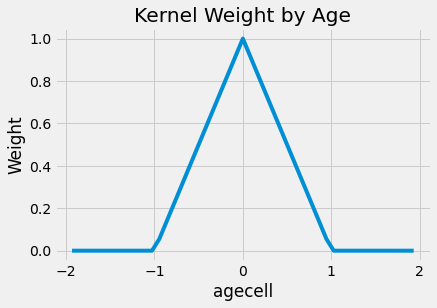

In [9]:
plt.plot(drinking["agecell"], kernel(drinking["agecell"], c=0, h=1))
plt.xlabel("agecell")
plt.ylabel("Weight")
plt.title("Kernel Weight by Age");

Nếu chúng ta áp dụng những trọng số này cho bài toán đầu tiên, tác động của rượu sẽ lớn hơn, ít nhất là đối với trường hợp tử vong gây ra bởi mọi nguyên nhân. Kết quả tăng vọt từ 7.6627 lên 9.7004. Kết quả vẫn có ý nghĩa thống kê. Ngoài ra, hãy lưu ý rằng tôi đang sử dụng `wls` thay vì `ols`

In [10]:
model = smf.wls("all~agecell*threshold", rdd_df,
                weights=kernel(drinking["agecell"], c=0, h=1)).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,93.2002,0.731,127.429,0.000,91.726,94.674
agecell,0.4109,1.789,0.230,0.819,-3.196,4.017
threshold,9.7004,1.034,9.378,0.000,7.616,11.785
agecell:threshold,-7.1759,2.531,-2.835,0.007,-12.276,-2.075


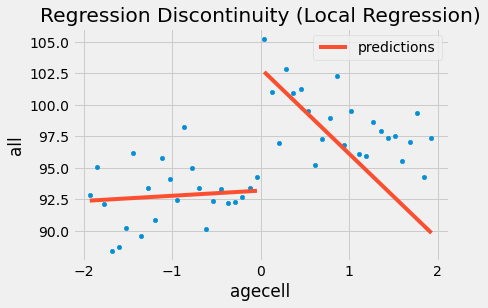

In [11]:
ax = drinking.plot.scatter(x="agecell", y="all", color="C0")
drinking.assign(predictions=model.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
plt.title("Regression Discontinuity (Local Regression)");

Và đây là những gì ta có được đối với tỷ lệ tử vong gây ra bởi các tác nhân khác. Lưu ý rằng hồi quy tại những điểm trên ngưỡng quyết định có xu hướng giảm lớn hơn vì nó không xem xét các điểm nằm xa ngưỡng quyết định.

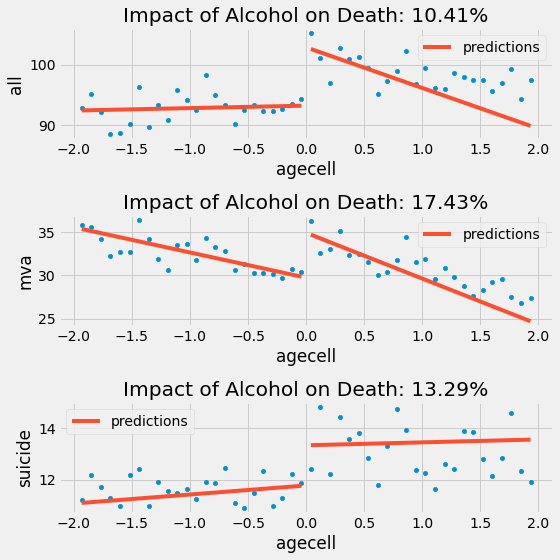

In [12]:
plt.figure(figsize=(8,8))
weights = kernel(drinking["agecell"], c=0, h=1)

for p, cause in enumerate(["all", "mva", "suicide"], 1):
    ax = plt.subplot(3,1,p)
    drinking.plot.scatter(x="agecell", y=cause, ax=ax)
    m = smf.wls(f"{cause}~agecell*threshold", rdd_df, weights=weights).fit()
    ate_pct = 100*((m.params["threshold"] + m.params["Intercept"])/m.params["Intercept"] - 1)
    drinking.assign(predictions=m.fittedvalues).plot(x="agecell", y="predictions", ax=ax, color="C1")
    plt.title(f"Impact of Alcohol on Death: {np.round(ate_pct, 2)}%")

plt.tight_layout()

Ngoại trừ tác nhân tự sát, có vẻ như việc thêm tỷ trọng kernel đã làm cho tác động tiêu cực của rượu lớn hơn. Một lần nữa, nếu chúng ta muốn giảm thiểu tỷ lệ tử vong, chúng ta KHÔNG nên khuyến nghị hạ độ tuổi uống rượu hợp pháp, bởi vì rõ ràng rượu có tác động đến tỷ lệ tử vong.

Trường hợp đơn giản này bao quát những gì xảy ra khi thiết kế hồi quy gián đoạn vận hành một cách hoàn hảo. Tiếp theo, chúng ta sẽ tìm hiểu một số chẩn đoán mà ta nên chạy để kiểm tra xem chúng ta có thể tin tưởng RDD đến mức nào và cùng nói về một chủ đề đã rất đỗi quen thuộc: tác động của giáo dục đối với thu nhập.

## Hiệu Ứng Da Cừu và RDD Mờ 

Khi nói đến tác động của giáo dục đối với thu nhập, có hai quan điểm chính trong kinh tế học. Lập luận đầu tiên được biết đến rộng rãi rằng giáo dục làm tăng vốn nhân lưc, tăng năng suất và do đó, tăng thu nhập. Theo quan điểm này, giáo dục thực sự thay đổi bạn theo hướng tốt hơn. Một quan điểm khác cho rằng giáo dục chỉ đơn giản là một cơ chế phát tín hiệu. Nó chỉ đẩy bạn đến với các bài kiểm tra và bài tập khó nhằn, và nếu bạn có thể làm được chúng, nó phát tín hiệu cho thị trường rằng bạn là một nhân viên giỏi. Theo quan điểm này, giáo dục không làm cho bạn năng suất hơn. Nó chỉ cho thị trường biết bạn luôn làm việc hiệu quả như thế nào. Điều quan trọng ở đây là bằng tốt nghiệp. Nếu bạn có nó, bạn sẽ được trả lương cao hơn. Chúng ta gọi đây là **hiệu ứng da cừu**, bởi vì trước đây bằng cấp được in bằng da cừu.

Để kiểm định giả thuyết này, [Clark và Martorell](https://faculty.smu.edu/millimet/classes/eco7321/papers/clark%20martorell%202014.pdf) đã sử dụng hồi quy gián đoạn để đo lường tác động của việc tốt nghiệp lớp 12 đối với thu nhập. Để làm được điều đó, họ đã phải cân nhắc một số biến chỉ định, theo đó nếu học sinh vượt qua ngưỡng quyết định đó thì tốt nghiệp và ngược lại. Họ đã tìm thấy dữ liệu như vậy trong hệ thống giáo dục Texas.

Để tốt nghiệp ở Texas, học sinh phải vượt qua một kỳ thi. Các kỳ kiểm tra bắt đầu từ năm lớp 10 và học sinh có thể làm nhiều lần, nhưng cuối cùng, các bạn trẻ phải đối mặt với kỳ thi cuối vào cuối năm lớp 12. Ý tưởng là lấy dữ liệu từ những học sinh đã tham gia các kỳ thi cuối đó và so sánh những học sinh thi trượt cận điểm đỗ với những bạn thi đậu cận điểm đỗ. Những học sinh này sẽ có vốn nhân lực rất tương đồng, nhưng khác biệt về tín hiệu chứng chỉ. Cụ thể, những học sinh vừa đủ điểm đỗ, sẽ nhận được bằng tốt nghiệp.

In [13]:
sheepskin = pd.read_csv("./data/sheepskin.csv")[["avgearnings", "minscore", "receivehsd", "n"]]
sheepskin.head()

,avgearnings,minscore,receivehsd,n
0,11845.086,-30.0,0.416667,12
1,9205.679,-29.0,0.387097,31
2,8407.745,-28.0,0.318182,44
3,11114.087,-27.0,0.377778,45
4,10814.624,-26.0,0.306667,75


Một lần nữa, dữ liệu được nhóm theo biến chỉ định. Nó không chỉ chứa biến chỉ định (`minscore`, với 0 là giá trị trung tâm) và kết quả (`avgearnings`), mà nó còn có xác suất nhận bằng tốt nghiệp theo ô điểm đó và kích thước của ô điểm (`n`). Vì vậy, ví dụ, trong số 12 học sinh có kết quả -30 dưới ngưỡng quyết định điểm, chỉ có 5 người có thể nhận được bằng tốt nghiệp.

Điều này có nghĩa là có sự giảm sút trong chỉ định can thiệp. Một số học sinh có số điểm dưới ngưỡng quyết định đỗ vẫn có thể xoay xở để lấy được bằng tốt nghiệp bằng mọi cách. Tại đây, hồi quy gián đoạn có dạng **mờ**, thay vì sắc . Lưu ý rằng xác suất nhận được bằng tốt nghiệp không tăng vọt từ 0 lên 1 tại ngưỡng quyết định mà nó nhảy từ khoảng 50% lên 90%.

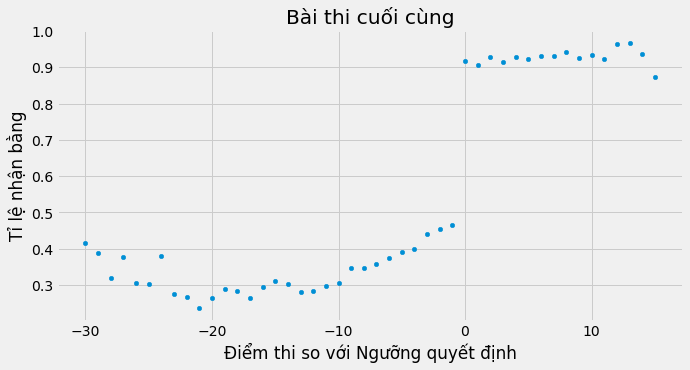

In [14]:
sheepskin.plot.scatter(x="minscore", y="receivehsd", figsize=(10,5))
plt.xlabel("Điểm thi so với Ngưỡng quyết định")
plt.ylabel("Tỉ lệ nhận bằng")
plt.title("Bài thi cuối cùng");

Chúng ta có thể nghĩ về RD mờ như một loại không tuân thủ. Việc vượt qua ngưỡng quyết định này sẽ khiến mọi học sinh nhận được bằng tốt nghiệp, nhưng một số học sinh, những người luôn không nhận, không nhận được bằng. Tương tự như vậy, những bạn có điểm dưới ngưỡng quyết định sẽ không nhận được bằng tốt nghiệp, nhưng một số học sinh, những nguời luôn nhận, vẫn xoay xở để lấy được bằng.

Cũng như kết quả tiềm năng, chúng ta có trạng thái can thiệp tiềm năng trong tình huống này. \\(T_1\\) là can thiệp mà mọi người nhận được nếu họ vượt quá ngưỡng quyết định. \\(T_0\\) là can thiệp mà mọi người nhận được nếu họ ở dưới ngưỡng quyết định. Như bạn đã thấy, chúng ta có thể xem **ngưỡng quyết định như một Biến Công Cụ**. Cũng giống như trong IV, yếu tố không tuân thủ làm cho tác động can thiệp mà chúng ta ước lượng bị thiên lệch về 0.

![img](./data/img/rdd/rdd_fuzzy.png)

Xác suất để can thiệp nhỏ hơn 1, thậm chí ở trên ngưỡng quyết định, làm cho kết quả chúng ta quan sát được thấp hơn kết quả tiềm năng thực \\(Y_1\\). Tương tự, kết quả mà chúng ta quan sát dưới ngưỡng quyết định cao hơn kết quả tiềm năng thực \\(Y_0\\). Điều này làm cho tác động can thiệp tại ngưỡng quyết định có vẻ như nhỏ hơn so với thực tế và chúng tôi sẽ phải sử dụng kỹ thuật IV để điều chỉnh.

Cũng như trước đây chúng ta đặt giả thiết rằng kết quả tiềm năng sẽ liên tục, bây giờ chúng ta cũng làm tương tự cho can thiệp tiềm năng. Ngoài ra, chúng ta cần đặt giả thiết cho đơn điệu, giống như trong IV. Nó nói rằng \\(T_{i1}>T_{i0} \ \forall i\\). Điều này có nghĩa là việc vượt qua ngưỡng quyết định từ trái sang phải chỉ làm tăng khả năng nhận được bằng tốt nghiệp (hoặc không có người luôn không nhận). Với 2 giả thiết này, chúng ta có Mô Hình Ước Lượng Wald cho LATE.

$$
\dfrac{\lim_{r \to c^+} E[Y_i|R_i=r] - \lim_{r \to c^-} E[Y_i|R_i=r]}{\lim_{r \to c^+} E[T_i|R_i=r] - \lim_{r \to c^-} E[T_i|R_i=r]} = E[Y_{1i} - Y_{0i} | T_{1i} > T_{0i}, R_i=c]
$$

Lưu ý rằng đây là một ước lượng cục bộ theo hai nghĩa. Đầu tiên, nó là cục bộ vì nó chỉ cho thấy tác động can thiệp tại ngưỡng quyết định \\(c\\). Đây là RD cục bộ. Thứ hai, nó là cục bộ vì nó chỉ ước lượng tác động can thiệp cho người tuân thủ. Đây là IV cục bộ.

Để ước lượng, chúng ta sẽ sử dụng 2 hồi quy tuyến tính. Tử số có thể được ước lượng theo cách chúng ta đã làm trước đó. Để có được mẫu số, chúng ta chỉ cần thay kết quả bằng can thiệp. Nhưng trước tiên, hãy bàn về kiểm định giả thiết mà chúng ta cần chạy để đảm bảo rằng ước lượng RDD có thể tin tưởng được.

### McCrary Test

Một thứ có thể phá vỡ lập luận RDD của chúng ta là nếu mọi người chi phối vị trí của họ tại ngưỡng quyết định. Nó có thể xảy ra trong ví dụ về da cừu nếu học sinh có điểm số ngay dưới ngưỡng quyết định tìm ra cách để nâng điểm bài kiểm tra lên một chút. Một ví dụ khác là khi bạn cần có thu nhập dưới một mức nhất định để nhận được trợ cấp chính phủ. Một số gia đình có thể cố tình giảm thu nhập chỉ để đủ điều kiện tham gia gói trợ cấp.

Trong các tình huống này, chúng ta có xu hướng thấy một hiện tượng gọi là tập hợp mật độ của biến chỉ định. Nghĩa là chúng ta sẽ có rất nhiều đối tượng ngay trên hoặc ngay dưới ngưỡng quyết định. Để kiểm tra điều này, chúng ta có thể vẽ biểu đồ hàm mật độ của biến chỉ định và xem liệu có bất kỳ đột biến nào xung quanh ngưỡng quyết định hay không. Đối với trường hợp của chúng ta, mật độ được biểu thị bởi cột `n` trong dữ liệu.

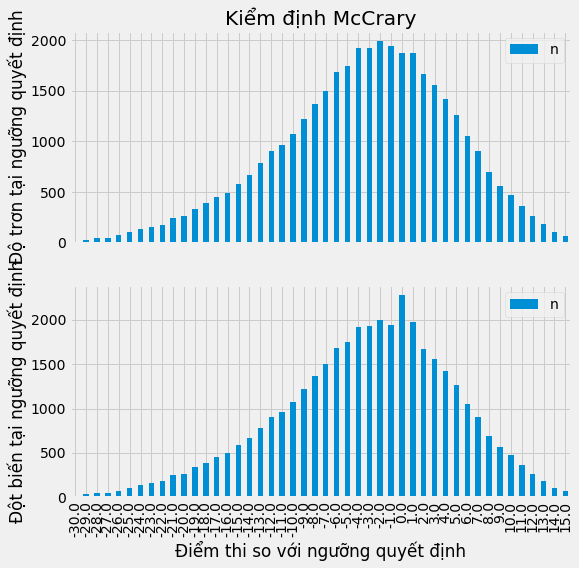

In [15]:
plt.figure(figsize=(8,8))

ax = plt.subplot(2,1,1)
sheepskin.plot.bar(x="minscore", y="n", ax=ax)
plt.title("Kiểm định McCrary")
plt.ylabel("Độ trơn tại ngưỡng quyết định")

ax = plt.subplot(2,1,2, sharex=ax)
sheepskin.replace({1877:1977, 1874:2277}).plot.bar(x="minscore", y="n", ax=ax)
plt.xlabel("Điểm thi so với ngưỡng quyết định")
plt.ylabel("Đột biến tại ngưỡng quyết định");

Biểu đồ đầu tiên cho thấy mật độ dữ liệu trông như thế nào. Như chúng ta có thể thấy, không có đột biến nào xung quanh ngưỡng quyết định, có nghĩa là không có hội tụ. Học sinh không thao túng điểm số của chúng tại ngưỡng quyết định. Chỉ nhằm mục đích minh họa, biểu đồ thứ hai cho thấy tập hợp sẽ như thế nào nếu học sinh có thể thao túng điểm số tại ngưỡng quyết định. Chúng ta sẽ thấy mật độ của các ô ngay trên ngưỡng quyết định tăng đột biến, vì nhiều học sinh có số điểm tại đó. Nhằm giải quyết vấn đề này, chúng ta có thể quay lại để ước lượng hiệu ứng da cừu.

Như tôi đã nói trước đây, tử số của Mô hình ước lượng wald có thể được ước lượng giống với cách ta đã làm trong RDD sắc . Tại đây, chúng ta sẽ sử dụng trọng số của kernel với dải tần suất là 15. Vì chúng ta cũng có kích thước của ô điểm, chúng ta sẽ nhân kernel với kích thước mẫu để có được trọng số cuối cùng cho ô điểm.

In [16]:
sheepsking_rdd = sheepskin.assign(threshold=(sheepskin["minscore"]>0).astype(int))
model = smf.wls("avgearnings~minscore*threshold",
                sheepsking_rdd,
                weights=kernel(sheepsking_rdd["minscore"], c=0, h=15)*sheepsking_rdd["n"]).fit()

model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.399e+04,83.678,167.181,0.000,1.38e+04,1.42e+04
minscore,181.6636,16.389,11.084,0.000,148.588,214.739
threshold,-97.7571,145.723,-0.671,0.506,-391.839,196.325
minscore:threshold,18.1955,30.311,0.600,0.552,-42.975,79.366


Nó cho chúng ta biết rằng tác động của bằng tốt nghiệp là -97,7571, nhưng con số này không mang ý nghĩa thống kê (trị số p là 0,5). Nếu chúng ta biểu diễn các kết quả, ta có một đường chạy liên tục qua ngưỡng quyết định. Những người có nhiều năm học vấn hơn thực sự kiếm được nhiều tiền hơn, nhưng không có đột biến nào ở thời điểm họ nhận được bằng tốt nghiệp lớp 12. Đây là một lập luận ủng hộ quan điểm rằng giáo dục tăng thu nhập bằng cách giúp cho mọi người làm việc hiệu quả hơn, bởi vì không có sự xuất hiện của hiệu ứng da cừu.

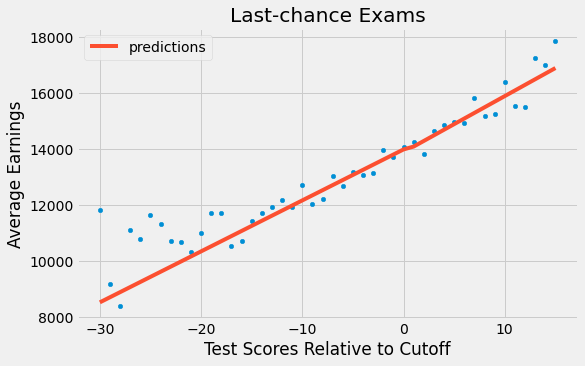

In [17]:
ax = sheepskin.plot.scatter(x="minscore", y="avgearnings", color="C0")
sheepskin.assign(predictions=model.fittedvalues).plot(x="minscore", y="predictions", ax=ax, color="C1", figsize=(8,5))
plt.xlabel("Test Scores Relative to Cutoff")
plt.ylabel("Average Earnings")
plt.title("Last-chance Exams");

Tuy nhiên, như chúng ta đã biết từ cách hoạt động của thiên lệch bất tuân, kết quả này thiên lệch về 0. Để chỉnh sửa, chúng ta cần chia tỷ trọng ở giai đoạn đầu và dùng Mô hình ước lượng wald. Thật không may, Python không có sẵn gói công cụ nào đủ tốt để giải quyết vấn đề này, vì vậy chúng ta sẽ phải thực hiện chúng thủ công và sử dụng bootstrap để đo được sai số chuẩn.

Đoạn code dưới đây ước lượng tử số của Mô hình ước lượng wald giống như chúng ta đã làm trước đây và nó cũng xây dựng mẫu số bằng cách thay thế biến mục tiêu bằng biến can thiệp `receivehsd`. Bước cuối cùng chỉ cần chia tử số cho mẫu số.

In [18]:
def wald_rdd(data):
    weights=kernel(data["minscore"], c=0, h=15)*data["n"]
    denominator = smf.wls("receivehsd~minscore*threshold", data, weights=weights).fit()
    numerator = smf.wls("avgearnings~minscore*threshold", data, weights=weights).fit()
    return numerator.params["threshold"]/denominator.params["threshold"]

In [19]:
from joblib import Parallel, delayed 

np.random.seed(45)
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(wald_rdd)(sheepsking_rdd.sample(frac=1, replace=True))
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

Với các mẫu bootstrap, chúng ta có thể biểu diễn phân phối của các ATE và xem thử khoảng tin cậy 95% nằm ở đâu.

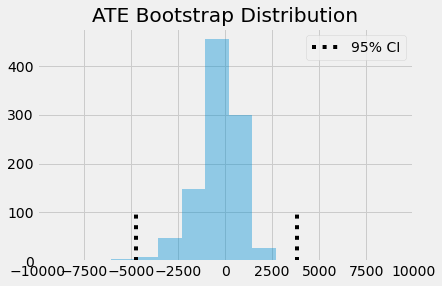

In [20]:
sns.distplot(ates, kde=False)
plt.vlines(ates.mean()-1.96*ates.std(), 0, 100, linestyles="dotted")
plt.vlines(ates.mean()+1.96*ates.std(), 0, 100, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.xlim([-10000, 10000])
plt.legend();

Bạn thấy đấy, ngay cả khi chúng ta chia tỷ trọng tác động ngay giai đoạn đầu, nó vẫn không khác 0 về mặt thống kê. Điều này có nghĩa là giáo dục không làm tăng thu nhập đơn giản chỉ bởi một hiệu ứng da cừu đơn thuần, mà do nó giúp gia tăng năng suất của con người.

## Ý tưởng chủ đạo

Chúng ta đã học cách tận dụng sự gián đoạn nhân tạo để ước lượng tác động nhân quả. Ý tưởng là chúng ta sẽ có một số ngưỡng quyết định nhân tạo khiến xác suất của sự can thiệp nhảy vọt. Một ví dụ mà chúng ta đã thấy là độ tuổi làm cho xác suất uống rượu tăng vọt ở độ tuổi 21, chúng ta có thể sử dụng điều này để ước lượng tác động của việc uống rượu. Thực tế chỉ ra rằng khi ở gần với ngưỡng quyết định, chúng ta có một phương pháp gần với thử nghiệm ngẫu nhiên. Các đối tượng ở rất gần ngưỡng quyết định có thể đã đi theo một trong hai hướng và những gì có thể xác định nơi chúng thuộc về là ngẫu nhiên. Với điều này, chúng ta có thể so sánh những đối tượng cận trên và cận dưới ngưỡng quyết định để có được tác động can thiệp. Chúng ta đã biết cách làm điều đó với hồi quy tuyến tính theo tỷ trọng bằng kernel và nó thậm chí còn cung cấp sai số chuẩn cho ATE mà chúng ta không cần phải mất tí công sức nào.

Sau đó, chúng ta xem xét điều gì sẽ xảy ra trong thiết kế RD mờ, khi có sự xuất hiện của việc không tuân thủ. Chúng ta thấy rằng cách ta có thể tiếp cận tình huống cũng giống như cách chúng ta đã làm với IV.

## Tài liệu tham khảo

Tôi muốn dành loạt bài viết này để vinh danh Joshua Angrist, Alberto Abadie and Christopher Walters vì khóa học Kinh tế lượng tuyệt cú mèo của họ. Phần lớn ý tưởng trong loạt bài này được lấy từ các bài giảng của họ được tổ chức bởi Hiệp hội Kinh tế Mĩ.  Theo dõi các bài giảng này là những gì tôi làm trong suốt năm 2020 khó nhằn.
* [Kinh tế lượng với dữ liệu chéo](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Luyện chưởng Kinh tế lượng Gần như Vô hại](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Tôi cũng muốn giới thiệu cuốn sách lý thú của Angrist. Chúng cho tôi thấy Kinh tế lượng, hoặc 'Lượng theo cách họ gọi không chỉ vô cùng hữu ích mà còn rất vui.

* [Kinh tế lượng Gần như Vô hại](https://www.mostlyharmlesseconometrics.com/)
* [Luyện chưởng 'Lượng](https://www.masteringmetrics.com/)

Tài liệu tham khảo cuối cùng của tôi là cuốn sách của Miguel Hernan and Jamie Robins. Nó là người bạn đồng hành tin cậy với tôi khi trả lời những câu hỏi nhân quả khó nhằn.

* [Sách Suy Luận Nhân Quả](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

# Bảng Từ Viết tắt 
|Viết tắt| Tiếng Anh | Tiếng Việt |
| --- | --- | --- | 
|IV|Instrumental Variable|Biến Công cụ| 
|RD|Regression Discontinuity|Hồi quy Gián đoạn| 
|RDD|Regression Discontinuity Design|Thiết kế Hồi quy Gián đoạn| 


# Bảng Thuật ngữ 
| Thuật ngữ | Tiếng Anh |
| --- | --- | 
|biến can thiệp|treatment variable| 
|biến công cụ|instrumental-variable, instrumental variable, instrument, instrument variable| 
|biến giả|dummy, dummy variable| 
|biến kết quả|outcome variable| 
|bootstrap|bootstrap| 
|can thiệp tiềm năng|potential treatment| 
|chỉ định can thiệp|treatment assignment| 
|code|code| 
|dải tần suất|bandwidth| 
|giá trị dự đoán|predicted value| 
|giả thuyết|hypothesis| 
|hiệu ứng da cừu|sheepskin effect| 
|hàm gián đoạn|discontinuous function| 
|hàm mật độ|density function| 
|hàm tam giác kernel|triangular kernel| 
|hàm tỷ trọng|weighting function| 
|hệ số chặn|intercept| 
|hồi quy|regression, regress| 
|hồi quy gián đoạn|regression discontinuity| 
|hồi quy tuyến tính|linear regression| 
|kiểm định giả thiết|sanity check| 
|kích thước mẫu|sample size| 
|kết quả tiềm năng|potential outcome| 
|mô hình hồi quy|regression model| 
|mô hình ước lượng wald|wald estimator| 
|mẫu|sample| 
|mật độ|density| 
|mật độ dữ liệu|data density| 
|ngưỡng|threshold| 
|phân phối|distribution| 
|sai số chuẩn|standard error| 
|tham số|parameter| 
|tham số dải tần suất|bandwidth parameter| 
|thiên lệch|bias| 
|thiên lệch bất tuân|non compliance bias| 
|thiết kế hồi quy gián đoạn|regression discontinuity design| 
|thử nghiệm ngẫu nhiên|randomised trial| 
|thử nghiệm ngẫu nhiên cục bộ|local randomized trial| 
|trị số p|p-value| 
|tác động can thiệp|treatment effect, treatment impact| 
|tác động can thiệp bình quân cục bộ|local average treatment effect| 
|xác suất|probability| 
|điểm dữ liệu|data point| 
|ước lượng cục bộ|local estimate| 
